# TPS NOV 2021

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [4]:
# dataframes de train y test
test_data = pd.read_csv("test.csv", index_col=0)
train_data = pd.read_csv("train.csv", index_col=0)


In [5]:
# targets y samples
train_samples = train_data.iloc[:, :-1]
train_targets = train_data.iloc[:, -1].to_numpy().astype("float64")


In [6]:
# estandarizacion de los datos de train y test
# Nota: Creo que esta no es la manera mas adecuada de estandarizar los datos.
train_samples = train_samples.apply(lambda x: (x - x.mean()) / x.std()).to_numpy()
test_data = test_data.apply(lambda x: (x - x.mean()) / x.std()).to_numpy()


In [115]:
from keras import models, layers
from keras import regularizers


model = models.Sequential(
    [
        layers.Dense(
            28,
            kernel_regularizer=regularizers.l2(0.001),
            activation="relu",
            input_shape=(100,),
        ),
        layers.Dense(28, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=[tf.keras.metrics.AUC()]
)


In [116]:
# hold_out validation
train_x, val_x, train_y, val_y = train_test_split(
    train_samples, train_targets, test_size=0.4
)
num_epochs = 5

history = model.fit(
    train_x,
    train_y,
    epochs=num_epochs,
    batch_size=1000,
    verbose=0,
    validation_data=(val_x, val_y),
)


Por alguna razon entre mas cercano es el puntaje de validación a 74.350 aprox., mejor es el puntaje en los datos de testing del LB. Si el puntaje de validación es mayor a 74.350, el puntaje del LB baja drasticamente, lo cual es contraintuivo.

[Link de una discusion al respecto](https://www.kaggle.com/c/tabular-playground-series-nov-2021/discussion/289619)

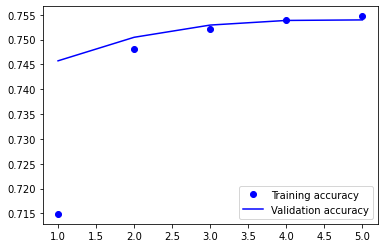

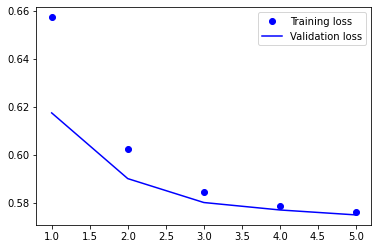

count    5.000000
mean     0.751370
std      0.003463
min      0.745710
25%      0.750447
50%      0.752909
75%      0.753838
max      0.753946
dtype: float64

In [119]:
# visualizacion de los resultados
acc = history.history["auc"]
val_acc = history.history["val_auc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, num_epochs + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.legend()

plt.show()

val_acc_df = pd.Series(val_acc).describe()
val_acc_df


In [121]:
# predicciones y submission file
predictions = pd.DataFrame(model.predict(test_data))
sample = pd.read_csv("sample_submission.csv")
out = pd.DataFrame({"id": sample.id, "target": predictions[0]})
out.to_csv("submission.csv", index=False)


In [122]:
! kaggle competitions submit -c tabular-playground-series-nov-2021 -f submission.csv -m "Aiming for 75.350"

100% 9.17M/9.17M [00:00<00:00, 26.3MB/s]
Successfully submitted to Tabular Playground Series - Nov 2021